In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df_num = df.select_dtypes(exclude='object')
df_num

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


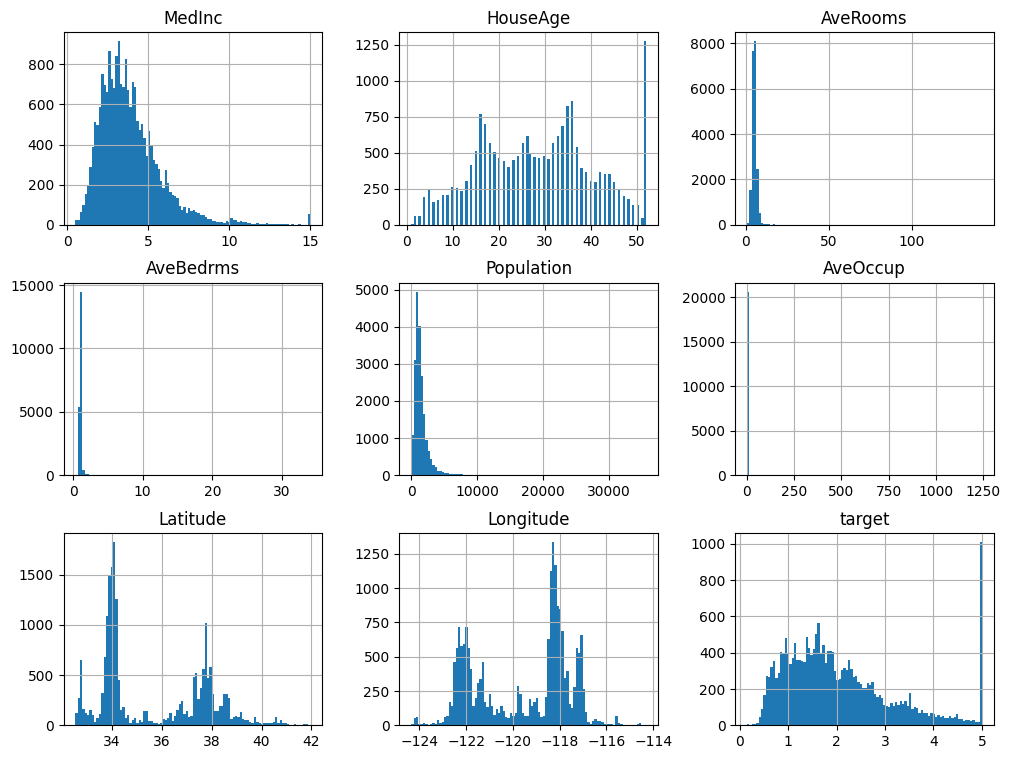

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=100,figsize=(12,9))
plt.show()

<Axes: >

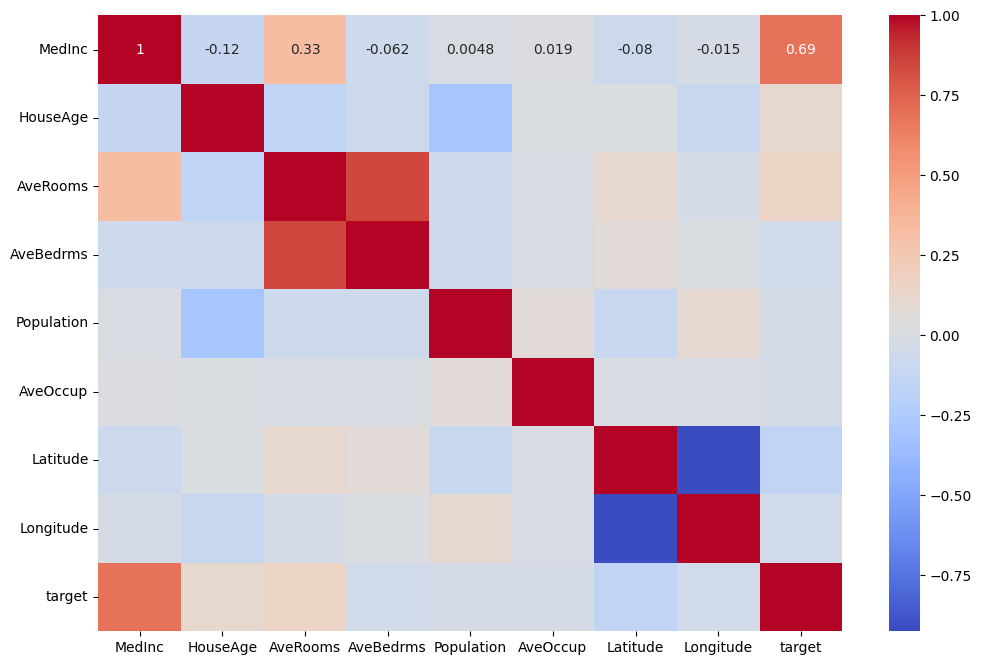

In [16]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

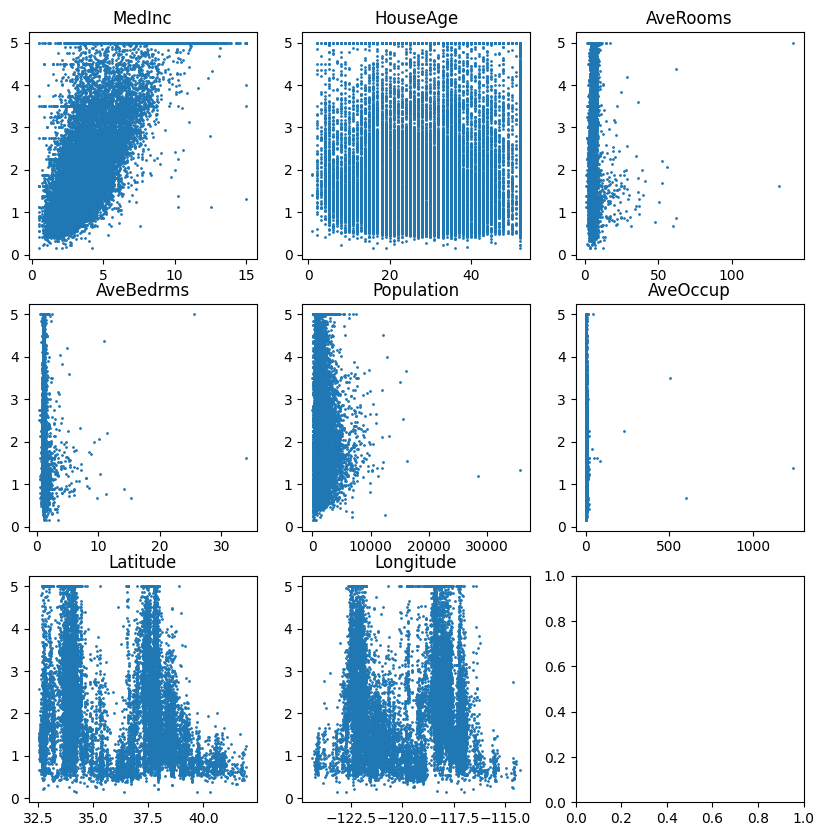

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  

for i in range(3):
    for j in range(3):
        if(i*3+j==8):
          break
        column = df.columns[i*3+j]
        x = df[column]
        y = df['target']
        axes[i, j].scatter(x,y, s=1)
        axes[i, j].set_title(column)

# 그래프 표시
plt.show()

In [18]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, shuffle=True, test_size=0.3)

In [20]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [56]:
best_mse = 10000
rmse = []
k_list = []
for K in range(20):
    K = K+1
    k_list.append(K)
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance',p=1) 
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mse = sqrt(mean_squared_error(y_val, pred))
    rmse.append(mse)
    print('K=',K,',','Rmse=',mse)
    if best_mse > mse:
        best_mse = mse
        best_k = K
print('-'*40)
print('best_k : ',best_k)

K= 1 , Rmse= 1.220373280876191
K= 2 , Rmse= 1.0729361520800824
K= 3 , Rmse= 1.028261783801484
K= 4 , Rmse= 1.0099402385323222
K= 5 , Rmse= 1.0023460981497676
K= 6 , Rmse= 0.9966878580343366
K= 7 , Rmse= 0.9934355435365955
K= 8 , Rmse= 0.995451500294389
K= 9 , Rmse= 0.9927922095186048
K= 10 , Rmse= 0.9936789173612124
K= 11 , Rmse= 0.9928011284931738
K= 12 , Rmse= 0.9951228882194846
K= 13 , Rmse= 0.9942780076176663
K= 14 , Rmse= 0.9956136343129239
K= 15 , Rmse= 0.9979134224189069
K= 16 , Rmse= 1.0000786604591416
K= 17 , Rmse= 1.0011094623895507
K= 18 , Rmse= 1.0017554256688643
K= 19 , Rmse= 1.0024846194000934
K= 20 , Rmse= 1.0037815927813463
----------------------------------------
best_k :  9


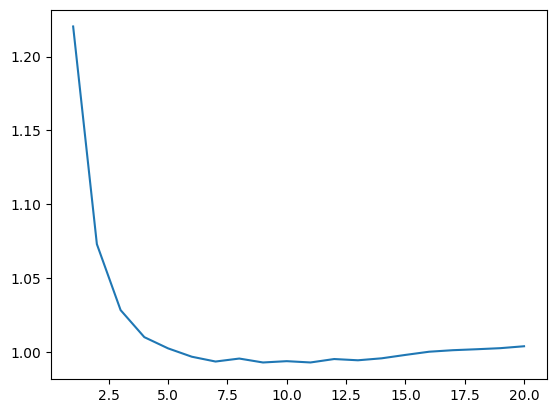

In [57]:
plt.plot(k_list,rmse)